In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from vatools.src.db_conn import DB_Connection
from vatools.src.model import Tree
from vatools.src.dataset import DataSet
from pandas_profiling import ProfileReport as profile
import pandas as pd
%matplotlib inline

## Loading the Dataset
The dataset has been loaded into a database, and here is being retrieved from the database and into a DataSet class, which will be used to create the train/test split and preprocess the data. The name of the table in the database is "credit" and "parameters.json" is information about the dataset, shown here:

In [3]:
data = DataSet('credit','parameters.json')

## Understanding the Dataset
Pandas Profiling is used here to show feature value distributions, missing values, extreme values, and other helpful information as we initially explore the dataset.

In [4]:
profile((data.data),correlation_threshold=1)

Number of variables,13
Number of observations,41016
Total Missing (%),1.7%
Total size in memory,4.1 MiB
Average record size in memory,104.0 B
Numeric,12
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


## Dealing with Missing Values
The DataSet Class has a method for imputing values for all or select features, allowing me to specify whether I want to impute missing values with the mean, median, mode, or zeros. In this case, we will impute the mean for each of the columns in both the training set and in the test set. After each command, the first five records from each dataset are printed and we can see that missing values in **monthlyincome** and **numberofdependents** have been imputed in **monthlyincome_imputed** and **numberofdependents_imputed** with the means their respective columns.

In [5]:
data.impute(data.train_set, 'mean')

,seriousdlqin2yrs,personid,revolvingutilizationofunsecuredlines,age,zipcode,numberoftime30_59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60_89dayspastduenotworse,numberofdependents,monthlyincome_imputed,numberofdependents_imputed
0,0,102751,0.012716,50,60625,0,0.343953,8599.0,13,0,2,0,2.0,8599,2
1,0,106771,0.024315,56,60644,0,0.006799,5000.0,5,0,0,0,0.0,5000,0
2,0,116739,0.954655,54,60625,0,0.661695,3150.0,4,0,1,0,0.0,3150,0
3,0,109178,0.041972,60,60629,0,71.000000,NaN,4,0,0,0,0.0,6631,0
4,0,120630,0.010172,57,60625,0,1483.000000,NaN,6,0,1,0,3.0,6631,3


In [6]:
data.impute(data.test_set, 'mean')

,seriousdlqin2yrs,personid,revolvingutilizationofunsecuredlines,age,zipcode,numberoftime30_59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60_89dayspastduenotworse,numberofdependents,monthlyincome_imputed,numberofdependents_imputed
0,0,148956,0.003502,77,60637,0,16.000000,NaN,7,0,0,0,0.0,6499,0
1,0,140750,0.591082,39,60618,1,0.460273,4983.0,6,0,1,0,3.0,4983,3
2,0,103339,0.760519,66,60625,0,0.631963,3841.0,8,0,0,0,0.0,3841,0
3,0,107309,0.003466,86,60625,1,2192.000000,NaN,15,0,1,0,0.0,6499,0
4,0,138688,0.000000,59,60637,0,0.902864,802.0,3,0,1,0,0.0,802,0


## Additional Feature Generation
In addition to using features as provided in the dataset, we can also create features by discretizing variables and creating dummy variables. Again, the DataSet class has methods to perform each of these operations on the data.

###  Creating Discrete Variables
Based on our exploration of the data above, it may be worthwhile to create discrete variables for **age**, and **numberofopencreditlinesandloans**.

In [7]:
data.discretize(data.train_set,'age',bins = 3, qcut = True).iloc[:,-1:]

[ 21.  45.  58. 109.]
1    8797
3    8052
2    7760
Name: age_discr, dtype: int64


,age_discr
0,2
1,2
2,2
3,3
4,2


In [8]:
data.discretize(data.train_set,'numberofopencreditlinesandloans',bins = 3, qcut=True).iloc[:,-1:]

[ 0.  6. 10. 52.]
1    10086
2     7424
3     7099
Name: numberofopencreditlinesandloans_discr, dtype: int64


,numberofopencreditlinesandloans_discr
0,3
1,1
2,1
3,1
4,1


In [9]:
data.discretize(data.test_set,'age',bins = 3,qcut=True, supress=True)
data.discretize(data.test_set,'numberofopencreditlinesandloans',bins = 3, qcut=True, supress=True)

[21. 44. 58. 99.]
1    5531
2    5465
3    5411
Name: age_discr, dtype: int64
[ 0.  6. 10. 56.]
1    6600
2    5152
3    4655
Name: numberofopencreditlinesandloans_discr, dtype: int64


### Creating Dummy Variables

In [10]:
data.dummies(data.test_set,columns=['age_discr']).iloc[:,-3:]

,age_discr_1,age_discr_2,age_discr_3
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [11]:
data.dummies(data.test_set,columns=['numberofopencreditlinesandloans_discr']).iloc[:,-3:]

,numberofopencreditlinesandloans_discr_1,numberofopencreditlinesandloans_discr_2,numberofopencreditlinesandloans_discr_3
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


## Selecting Our Variables
Below is a reference key of all of the features available to train and test the model on. Once we decide which features we want to train our model on, we can move forward with fitting a model. In this case, we will be fitting a Decision Tree model.

In [12]:
data.feature_key()

1 = personid
2 = revolvingutilizationofunsecuredlines
3 = age
4 = zipcode
5 = numberoftime30_59dayspastduenotworse
6 = debtratio
7 = monthlyincome
8 = numberofopencreditlinesandloans
9 = numberoftimes90dayslate
10 = numberrealestateloansorlines
11 = numberoftime60_89dayspastduenotworse
12 = numberofdependents
13 = monthlyincome_imputed
14 = numberofdependents_imputed
15 = age_discr
16 = numberofopencreditlinesandloans_discr


For fitting a Decision Tree model, we will choose to train on: <br/>**numberofopencreditlinesandloans [8]**, <br/>**age [3]**, <br/>and **numberofopencreditlinesandlonas_discr [16]**.

## Building a Decision Tree Model
We will fit a model using the three aforementioned features and allow a max_depth of 3. All other parameters for the Decision Tree are the default parameters. 


In [13]:
tree = Tree(data,[3,8,16],max_depth=3,min_samples_leaf = 1)

X[0] is age
X[1] is numberofopencreditlinesandloans
X[2] is numberofopencreditlinesandloans_discr



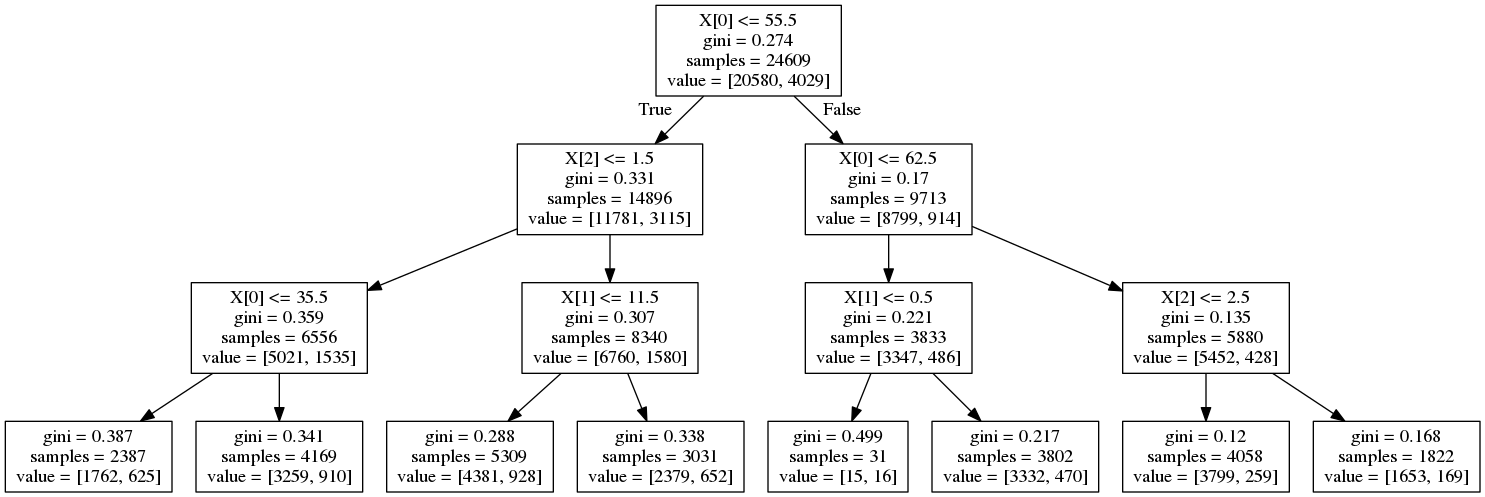

In [14]:
tree.visualize()

## Evaluating the Model
Here we have two confusion matricies which detail the False Positives (Quadrant I), True Negatives (Quadrant II), False Negatives (Quadrant III), and True Positives (Quadrant IV). We in this case set a probability threshold of .15%, meaning any person that was predicted with 15% probability to experience financial distress in the next two years is labelled as a positive (and those with less than 15% are labelled as a negative).

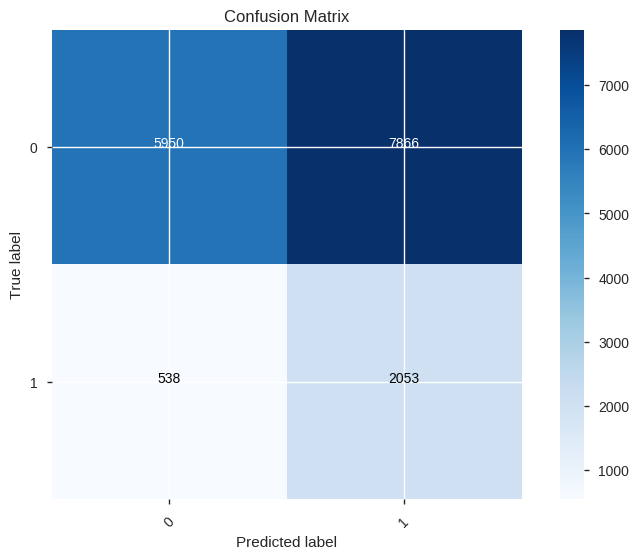

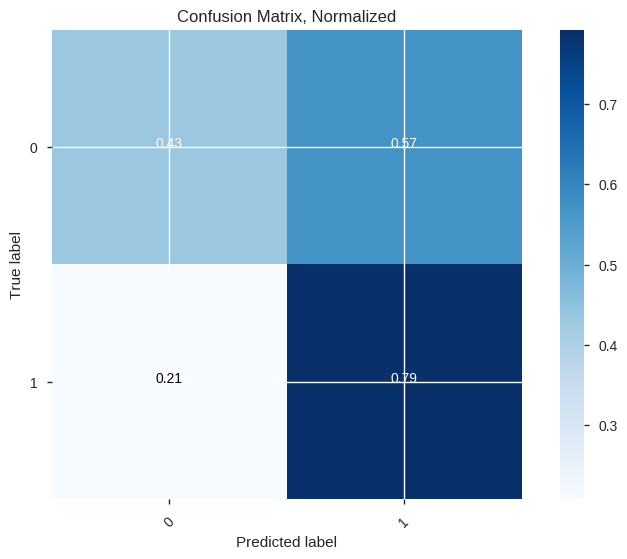

In [15]:
tree.confusion_matrix(threshold=.15)